# Project 2 AMES Data Housing

## Problem Statement

The process of buying a home can be lengthy and complex, with buyers often viewing numerous properties over several weeks to find the right match [1]. The importance of this decision is underscored by the length of time homeowners typically remain in their new homes, emphasizing the need for a considered and well-informed purchase [2].

The aim of this project is to create a predictive model using the Ames Housing Dataset to accurately predict the sale prices of houses in Ames, Iowa. This rich dataset, which comprises over 70 features of residential homes, serves as the backbone for a model that can significantly enhance the efficiency of the home selection process. By providing accurate price predictions, we seek to expedite the search for potential homeowners, thus improving the overall experience and satisfaction for both buyers and real estate professionals.

**References**

[1] - Realtor.com (2023). "How Many Homes Will It Take?" Available: [Realtor.com Advice](https://www.realtor.com/advice/buy/how-many-homes-will-it-take/).

[2] - National Association of Realtors (2023). "How Long Do Homeowners Stay in Their Homes?" Available: [National Association of Realtors Blog](https://www.nar.realtor/blogs/economists-outlook/how-long-do-homeowners-stay-in-their-homes#:~:text=As%20of%202018%2C%20the%20median,U.S.%20is%2013%20years1).

[3] - Original Data Dictionary Available: [Data Dictionary](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


**Model Development:**

I will employ a regression model, specifically focusing on Lasso Regression due to its ability to perform feature selection and manage multicollinearity, which is anticipated given the dataset's breadth. Lasso Regression's capacity to reduce the coefficient values of less important features to zero will be crucial in identifying the most significant predictors of house sale prices.

**Success Evaluation**:

The success of our model will be evaluated based on its prediction accuracy, quantified through metrics such as the Root Mean Squared Error ($RMSE$) and R-squared ($R^2$) values. These metrics will offer insights into how well the model can generalize to unseen data, with a lower $RMSE$ indicating higher accuracy, and a higher $R^2$ value signifying a better fit to the observed data.

## Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

from sklearn.exceptions import ConvergenceWarning
import warnings

## Reading Data

In [ ]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [ ]:
train.head(3)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,532,1612,526352080,20,RL,85.0,10667,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,415,2045,904100100,70,RL,107.0,12888,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,273,1962,535451110,20,RL,60.0,7200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000


In [ ]:
test.head(3)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,1124,2782,907200170,80,RL,55.0,10780,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,7,2006,WD
1,188,2569,535125060,60,RL,88.0,14200,Pave,NaN,Reg,...,0,0,0,NaN,GdPrv,NaN,0,5,2006,WD
2,1727,1062,528142020,60,RL,74.0,8899,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,6,2008,WD


In [ ]:
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (1538, 82)
test shape: (513, 81)


In [ ]:
print(f'missing values in train: {train.isna().sum().sum()}')
print(f'missing values in test: {test.isna().sum().sum()}')

missing values in train: 8286
missing values in test: 2754


In [ ]:
for col in train.columns:
    print(col)

Unnamed: 0
Id
PID
MS SubClass
MS Zoning
Lot Frontage
Lot Area
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Mas Vnr Area
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Heating
Heating QC
Central Air
Electrical
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
Kitchen Qual
TotRms AbvGrd
Functional
Fireplaces
Fireplace Qu
Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond
Paved Drive
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Pool QC
Fence
Misc Feature
Misc Val
Mo Sold
Yr Sold
Sale Type
SalePrice


## EDA

I aim to uncover the underlying structure of the data, identify potential relationships between variables, and detect any outliers or anomalies that could affect our analysis. Specifically, we will focus on:

- **Collinearity**: Keeping similar feature may not be advantageous. It is important to look at correlation between features. There may be an instance of repeated information
- **SalePrice Distribution**: Understanding the distribution of SalePrice helps in grasping the central tendency, spread, and shape of the data. This can reveal patterns such as skewness or multimodality, which might suggest transformations necessary for modeling.

- **SalePrice Correlation Heatmap**: By visualizing the correlation matrix as a heatmap, we can easily identify how SalePrice relates to other variables. This not only helps in pinpointing strong predictors for our model but also in detecting multicollinearity between features.

- **10 Top Features Most Correlated with SalePrice**: Identifying and focusing on the features that have the highest correlation with SalePrice allows us to prioritize the most influential variables. This can significantly enhance model performance by concentrating on the most relevant predictors.

## Removing Colinear Features

In [ ]:
corr_matrix = train.select_dtypes(include=['int64', 'float64']).corr().abs()
corr_matrix.drop(columns='SalePrice', inplace=True)

high_corr_var = np.where(corr_matrix > 0.55)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

high_corr_var

[('Id', 'Yr Sold'),
 ('Lot Frontage', 'Lot Area'),
 ('Overall Qual', 'Year Built'),
 ('Overall Qual', 'Year Remod/Add'),
 ('Overall Qual', 'Gr Liv Area'),
 ('Overall Qual', 'Garage Yr Blt'),
 ('Overall Qual', 'Garage Cars'),
 ('Overall Qual', 'Garage Area'),
 ('Year Built', 'Year Remod/Add'),
 ('Year Built', 'Garage Yr Blt'),
 ('Year Remod/Add', 'Garage Yr Blt'),
 ('BsmtFin SF 1', 'Total Bsmt SF'),
 ('BsmtFin SF 1', 'Bsmt Full Bath'),
 ('Total Bsmt SF', '1st Flr SF'),
 ('1st Flr SF', 'Gr Liv Area'),
 ('2nd Flr SF', 'Gr Liv Area'),
 ('2nd Flr SF', 'Half Bath'),
 ('2nd Flr SF', 'TotRms AbvGrd'),
 ('Gr Liv Area', 'Full Bath'),
 ('Gr Liv Area', 'TotRms AbvGrd'),
 ('Bedroom AbvGr', 'TotRms AbvGrd'),
 ('Garage Yr Blt', 'Garage Cars'),
 ('Garage Cars', 'Garage Area')]

In [ ]:
for col1, col2 in high_corr_var:
    print(f'{col1} NaNs: {train[col1].isna().sum()} | {col2} NaNs: {train[col2].isna().sum()}')

Id NaNs: 0 | Yr Sold NaNs: 0
Lot Frontage NaNs: 253 | Lot Area NaNs: 0
Overall Qual NaNs: 0 | Year Built NaNs: 0
Overall Qual NaNs: 0 | Year Remod/Add NaNs: 0
Overall Qual NaNs: 0 | Gr Liv Area NaNs: 0
Overall Qual NaNs: 0 | Garage Yr Blt NaNs: 88
Overall Qual NaNs: 0 | Garage Cars NaNs: 0
Overall Qual NaNs: 0 | Garage Area NaNs: 0
Year Built NaNs: 0 | Year Remod/Add NaNs: 0
Year Built NaNs: 0 | Garage Yr Blt NaNs: 88
Year Remod/Add NaNs: 0 | Garage Yr Blt NaNs: 88
BsmtFin SF 1 NaNs: 1 | Total Bsmt SF NaNs: 1
BsmtFin SF 1 NaNs: 1 | Bsmt Full Bath NaNs: 2
Total Bsmt SF NaNs: 1 | 1st Flr SF NaNs: 0
1st Flr SF NaNs: 0 | Gr Liv Area NaNs: 0
2nd Flr SF NaNs: 0 | Gr Liv Area NaNs: 0
2nd Flr SF NaNs: 0 | Half Bath NaNs: 0
2nd Flr SF NaNs: 0 | TotRms AbvGrd NaNs: 0
Gr Liv Area NaNs: 0 | Full Bath NaNs: 0
Gr Liv Area NaNs: 0 | TotRms AbvGrd NaNs: 0
Bedroom AbvGr NaNs: 0 | TotRms AbvGrd NaNs: 0
Garage Yr Blt NaNs: 88 | Garage Cars NaNs: 0
Garage Cars NaNs: 0 | Garage Area NaNs: 0


In [ ]:
cols_to_drop = ['Lot Frontage', 'Id', 'Garage Yr Blt', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'TotRms AbvGrd']
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

After viewing the correlation between features. I decided to remove some of the columns to remove redundancy. The way I chose which column to drop was to see which had few missing values. In the chance both features had the same amount of missing values I would manually decide which feature may be more important.

### SalePrice Distribution

In [ ]:
train['SalePrice'].median()

162250.0

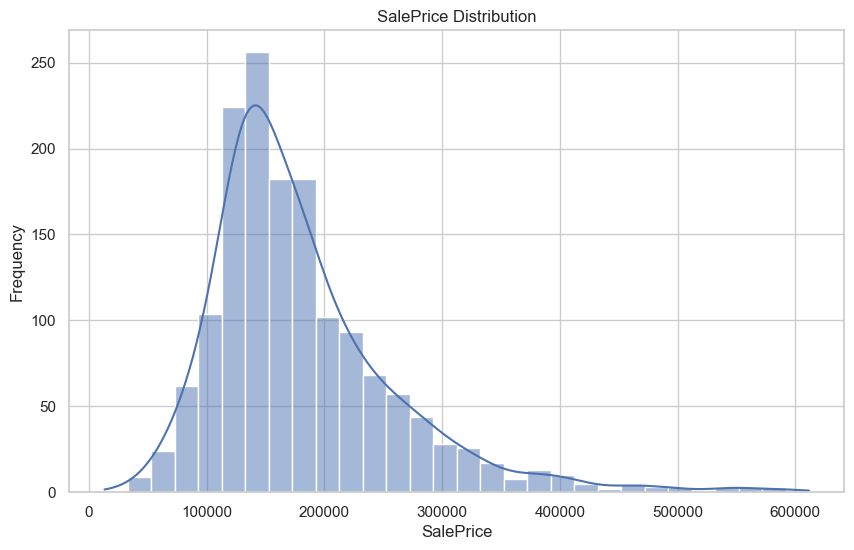

In [ ]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

What do we get from the plot?:

1. The distribution of SalePrice seems to be concentrated around a certain value that appears to be somewhere between $100,000 and $200,000. This suggests that the most common range of sale prices falls within this interval.

2. The prices range from near $0 to over $600,000, indicating a wide spread in the data.

3. The distribution appears to be right-skewed, with a longer tail extending towards the higher end of the SalePrice scale. This skewness indicates that there are a number of houses that are priced significantly higher than the mode of the data.

4. Given the long tail to the right, it’s likely that there are outliers on the higher end of the SalePrice scale.

5. The plot suggests a unimodal distribution, with one peak and no evidence of multiple modes.


### SalePrice Correlation

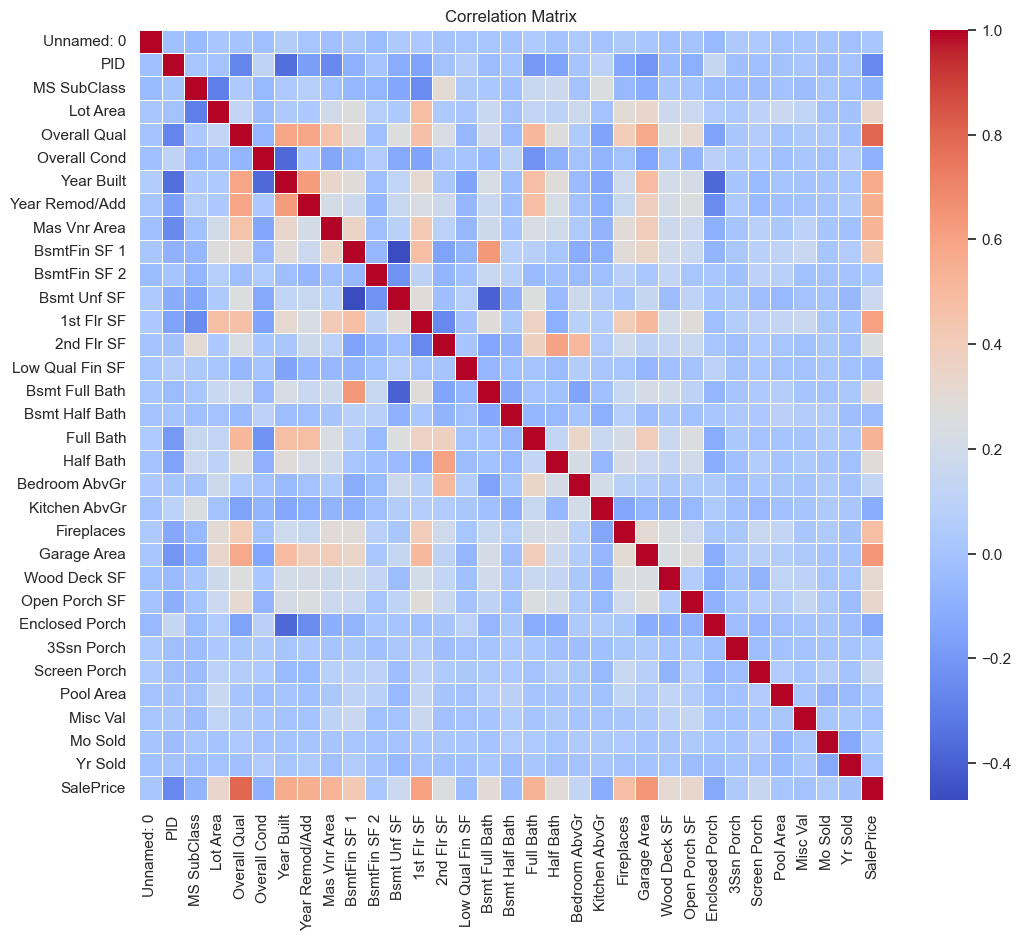

In [ ]:
corr_matrix = train.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Both positively and negatively correlated features with SalePrice are of particular interest. Features that have a strong positive correlation can indicate a direct relationship where an increase in the feature could potentially increase the SalePrice. On the other hand, features with a strong negative correlation suggest an inverse relationship, where higher values of the feature might correspond to lower SalePrice values.

### Top 10 Most Correlated with SalePrice

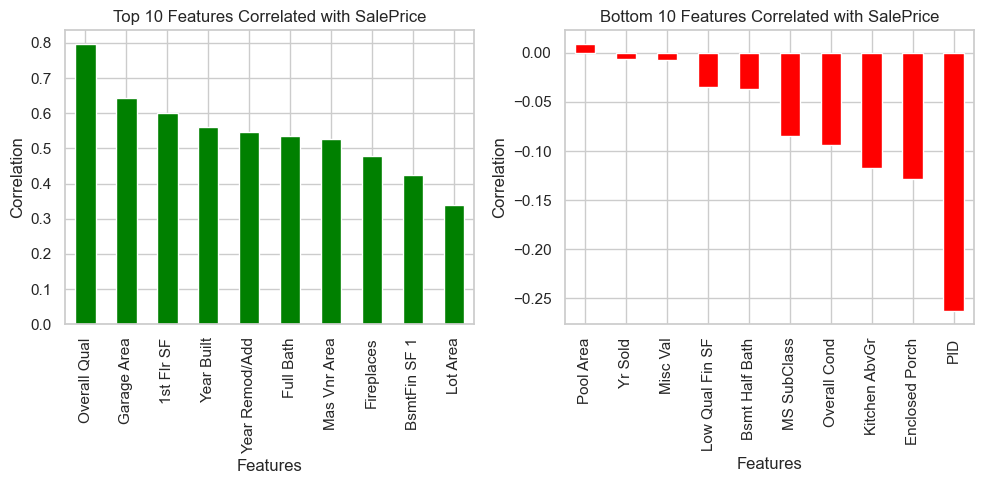

In [ ]:
sale_price_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
top_ten_corr = sale_price_corr.drop('SalePrice')

# plot top 10 and bottom 10 correlated features with SalePrice
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
top_ten_corr.head(10).plot(kind='bar', ax=ax[0], color='green')
top_ten_corr.tail(10).plot(kind='bar', ax=ax[1], color='red')
ax[0].set_title('Top 10 Features Correlated with SalePrice')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Correlation')
ax[1].set_title('Bottom 10 Features Correlated with SalePrice')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Correlation')
plt.tight_layout()
plt.show()





The left plot shows features with the strongest positive correlations to SalePrice. These features are likely good predictors for the sale price of the houses. High values in these features are associated with higher sale prices, which could be a direct result of these attributes adding value to a property.

The feature Overall Qual, has the strongest positive correlation with SalePrice. This suggests that a house's overall quality is a significant determinant of its sale price.

Several features indicative of the size and space of the property, such as Gr Liv Area (above-ground living area square feet), Garage Cars, Garage Area, Total Bsmt SF (total basement square feet), and 1st Flr SF (first floor square feet), are all highly correlated with SalePrice. This reflects conventional wisdom that larger houses and those with more garage space tend to sell for more.

Year Built and Year Remod/Add (remodel date) also appear to be positively correlated with sale prices, indicating that newer homes or those recently remodeled may fetch higher prices.

The presence of Full Bath also shows a strong positive correlation, pointing out that the number of full bathrooms is important to property value.

The right plot indicates features with negative correlations to SalePrice, though these correlations are weak. This implies that as these feature values increase, the sale prices tend to slightly decrease, or these features are less relevant in predicting higher sale prices.

The most negatively correlated feature is PID (parcel identification number), followed by features like Enclosed Porch and Kitchen AbvGr (kitchens above grade). These negative correlations are relatively weak compared to the strong positive correlations observed in the top 10 features.

While the negatively correlated features do have an inverse relationship with SalePrice, their weak correlation coefficients suggest they have a much smaller impact on sale prices than the positively correlated features. However, they may still provide valuable information when combined with other features or in more complex models that capture non-linear relationships.

## Train Test Split

In [ ]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing Pipelines


The decision to impute missing values rather than dropping them is a strategic choice in data preprocessing that can significantly influence the performance of predictive models. Here are the reasons and logic for choosing imputation over dropping:

1. **Maximizing Data Use**: Dropping rows or columns with missing values can lead to a significant loss of data. If the missingness isn't pervasive, imputation allows us to retain those observations in our dataset, maximizing the information available for model training.

2. **Preserving Sample Size**: Especially in datasets with a limited number of observations, preserving every data point becomes crucial to maintain statistical power and prevent biases that could arise from a reduced sample size.

3. **Avoiding Bias**: Dropping values can introduce bias if the missingness is not completely random. Imputation, particularly methods like KNN Imputation that predict missing values using the similarity between observations, helps mitigate this issue by estimating the missing values based on the data's inherent structure.

4. **Reflecting Real-world Scenarios**: In the real world, data is often incomplete. By learning to predict with a dataset that has been imputed, the model may better handle missing data when making predictions in real-world applications.

As for the pipeline setup, I have two distinct pipelines for numerical and categorical features to account for the different nature of data preprocessing required for each data type:

**Numerical Pipeline**: The KNNImputer imputes missing values using the mean value of the nearest neighbors found in the training set, which is a more nuanced approach compared to using the overall mean. This is particularly useful for numerical data, where I expect a continuity of values. The StandardScaler standardizes features by removing the mean and scaling to unit variance.

**Categorical Pipeline**: The SimpleImputer with a strategy of 'most_frequent' replaces missing values with the most common category, which is a straightforward approach for categorical data. The OneHotEncoder then transforms these categorical variables into a format that can be provided to machine learning algorithms.

**The ColumnTransformer** allows us to apply these separate pipelines to their respective feature types in a streamlined fashion, creating a cleaner and more organized preprocessing step.

Finally, the **Lasso** regression model is known for its ability to perform feature selection by shrinking the coefficients of less important features to zero. In the grid search, I'm tuning the alpha parameter, which controls the strength of the regularization applied, and the n_neighbors for the KNN imputer, which can affect the imputation accuracy.

This carefully crafted pipeline sets up strategy to address the specific characteristics and needs of the different data types within the dataset, while also optimizing the model's ability to make accurate predictions.

In [ ]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

## Model Pipeline

In [ ]:
lasso = Lasso()

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', lasso)
])

## GridSearch

In [ ]:
lasso_param_grid = {
    'lasso__alpha': np.logspace(-3, 3, 13),
    'preprocessor__num__imputer__n_neighbors': [3, 5, 7, 9, 11],
}

lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

## Fit Model

In [ ]:
# for faster training add n_jobs=-1 to GridSearchCV other wise it takes roughly 2.5 minutes to train
# parallelize the training will show ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    lasso_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


## Select Best Model

In [ ]:
lasso_best_estimator = lasso_grid_search.best_estimator_

In [ ]:
print(f'Best parameters: {lasso_grid_search.best_params_}')

Best parameters: {'lasso__alpha': 31.622776601683793, 'preprocessor__num__imputer__n_neighbors': 3}


## Predictions

In [ ]:
lasso_train_preds = lasso_best_estimator.predict(X_train)
lasso_val_preds = lasso_best_estimator.predict(X_val)

## Evaluation

### Best Train / Val RMSE

In [ ]:
lasso_train_rmse = mean_squared_error(y_train, lasso_train_preds, squared=False)
lasso_val_rmse = mean_squared_error(y_val, lasso_val_preds, squared=False)

print(f'Lasso Train RMSE: {lasso_train_rmse}')
print(f'Lasso Validation RMSE: {lasso_val_rmse}')

Lasso Train RMSE: 19481.12507604256
Lasso Validation RMSE: 21771.42642202993


Training RMSE: The training RMSE of $19,481.12 indicates that, on average, the model’s predictions on the training set deviate from the actual sale prices by about $19,481.12. This gives us an initial idea about the model’s performance on the data it was trained on.

Validation RMSE: The validation RMSE being higher at $21,771.42 suggests that the model doesn’t perform as well on unseen data as it does on the training data. This could indicate that the model is not generalizing perfectly, but the increase in RMSE is not drastic, which is a positive sign of model's robustness. The difference between train and validation is $2,290.3 which is a reasonable value to be off by in relation to the price of a house.

### Best Train / Val $R^2$ score

In [ ]:
lasso_train_r2 = r2_score(y_train, lasso_train_preds)
lasso_val_r2 = r2_score(y_val, lasso_val_preds)

print(f'Lasso Train R2: {lasso_train_r2}')
print(f'Lasso Validation R2: {lasso_val_r2}')

Lasso Train R2: 0.9404546044364379
Lasso Validation R2: 0.9226610045744533


Training $R^2$: An $R^2$ score of approximately 0.941 on the training data indicates that the model explains about 94.1% of the variance in SalePrice. This is a strong score, suggesting that the model fits the training data well.

Validation $R^2$: On the validation set, the $R^2$ score is approximately 0.923, which means the model explains about 92.3% of the variance in SalePrice. The slight drop from the training $R^2$ to the validation $R^2$ indicates that the model is slightly less effective at predicting the unseen data, but it still retains most of its explanatory power.

## Plot Residuals

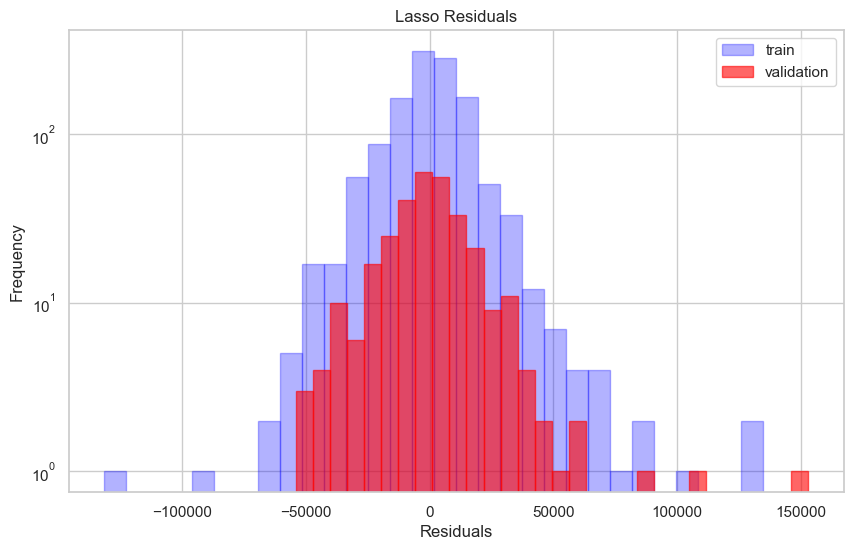

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_train - lasso_train_preds, bins=30, alpha=0.3, color='blue', label='train', edgecolor='blue')
plt.hist(y_val - lasso_val_preds, bins=30, alpha=0.6, color='red', label='validation', edgecolor='red')
plt.title('Lasso Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()


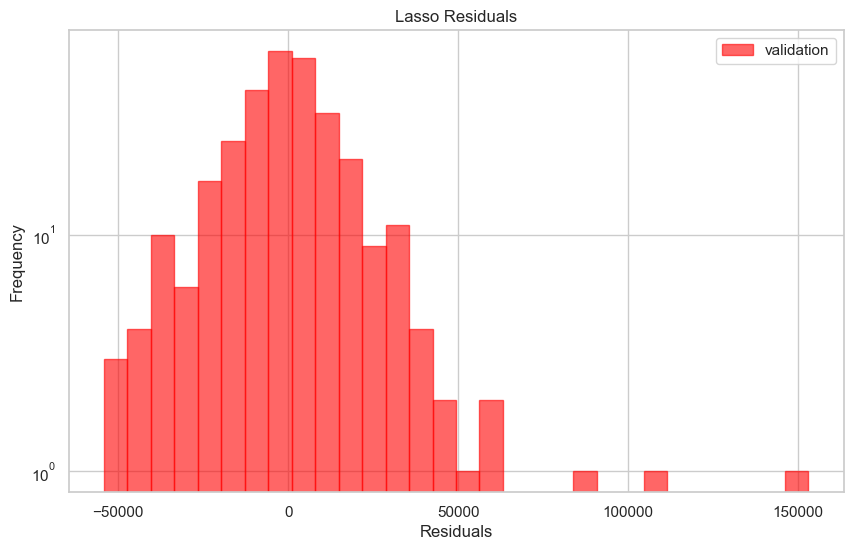

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_val - lasso_val_preds, bins=30, alpha=0.6, color='red', label='validation', edgecolor='red')
plt.title('Lasso Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

This histogram represents the residuals of the Lasso Regression model for both the training and validation datasets. Residuals are the differences between the actual values and the predicted values from the model. Here's what the histogram tells shows:

This histogram shows that most residuals are indeed around zero, suggesting that the model's predictions are generally close to the true values.

The residuals appear to have a somewhat normal distribution, especially in the center of the plot where the frequency of residuals is highest. However, the long tails to both the left and right indicate that there are several outliers or predictions that are far from the actual values.

There's a slight right skew visible in the validation residuals, implying that the model underestimates the actual values more often than overestimating them.

The range of residuals is quite broad, with some residuals being more than $100,000 off the actual value. This indicates that there may be some instances where the model's predictions are significantly inaccurate.

Overall, the histogram suggests the model is doing a decent job predicting the housing prices, as evidenced by the clustering of residuals around zero, but there might be room for improvement, especially in handling outliers that lead to larger residuals.

## Plot Actual Price vs Predicted Price

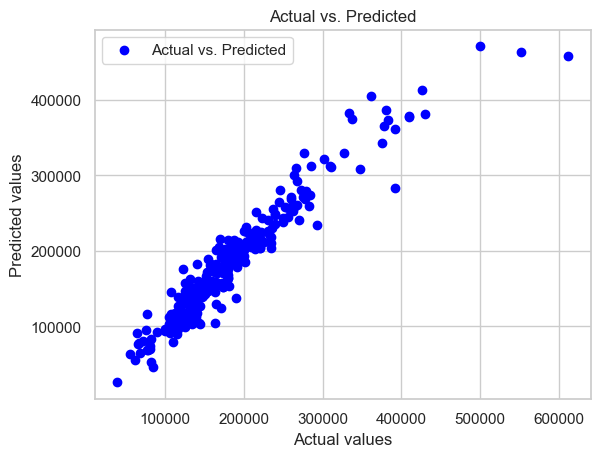

In [ ]:
# Plot SalePrice with model.predictproba

y_val_predproba = lasso_best_estimator.predict(X_val)


plt.scatter(y_val, y_val_predproba, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


The dense cluster of points along the diagonal suggests a strong positive correlation between the actual and predicted values. This indicates that the model has a good degree of predictive accuracy.

For the highest actual sale prices (the three points in the top right corner), the model underestimates the values, with predicted prices falling short of the actual sale prices. This might indicate that the model is less capable of accurately predicting prices in the higher range, which could be due to a lack of representative samples of expensive houses in the training data.

The plot generally shows closer predictions around the middle of the price range, with the model potentially being more accurate for mid-range homes. However, as we move towards the extremes, particularly the upper range, the model's predictions deviate more from the actual values.

Despite the underestimation at the higher end, the overall clustering around the line of perfect fit (where predicted values equal actual values) suggests the model is generally well-calibrated and could provide a reliable estimate of house prices within the observed range, with some exceptions at the upper end.

Considering the R^2 scores provided earlier (0.9407 for training and 0.9226 for validation), the model appears to perform quite well, particularly for typical house prices. The exceptions at the higher end could be an area of focus for further model improvement.

## Best and Worst features

In [ ]:
lasso_model = lasso_best_estimator.named_steps['lasso']
preprocessor = lasso_best_estimator.named_steps['preprocessor']

# Extract coefficients
coefficients = lasso_model.coef_

# Getting feature names directly for numerical features
num_features_names = num_features.tolist()

# Getting encoded feature names for categorical features
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_features_names = cat_encoder.get_feature_names_out(cat_features)

# Combine numerical and encoded categorical feature names
all_feature_names = num_features_names + cat_features_names.tolist()

# Create DataFrame with feature names and coefficients
feature_importance = pd.DataFrame(coefficients, index=all_feature_names, columns=['Coefficient'])

# Sort by absolute value of coefficients to see the most significant features
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
sorted_features = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print("Most Significant Features in Predicting House Prices:")
print(sorted_features.head(10))


Most Significant Features in Predicting House Prices:
                        Coefficient  Absolute_Coefficient
Roof Matl_ClyTile    -543434.096619         543434.096619
Misc Feature_Elev    -415148.216723         415148.216723
Neighborhood_GrnHill   92118.918889          92118.918889
Roof Style_Mansard    -56165.993169          56165.993169
Roof Matl_WdShngl      43692.371929          43692.371929
Neighborhood_StoneBr   41509.734924          41509.734924
Exter Qual_Ex          33792.898526          33792.898526
Neighborhood_NoRidge   24725.570186          24725.570186
2nd Flr SF             23254.875631          23254.875631
Kitchen Qual_Ex        20077.422298          20077.422298


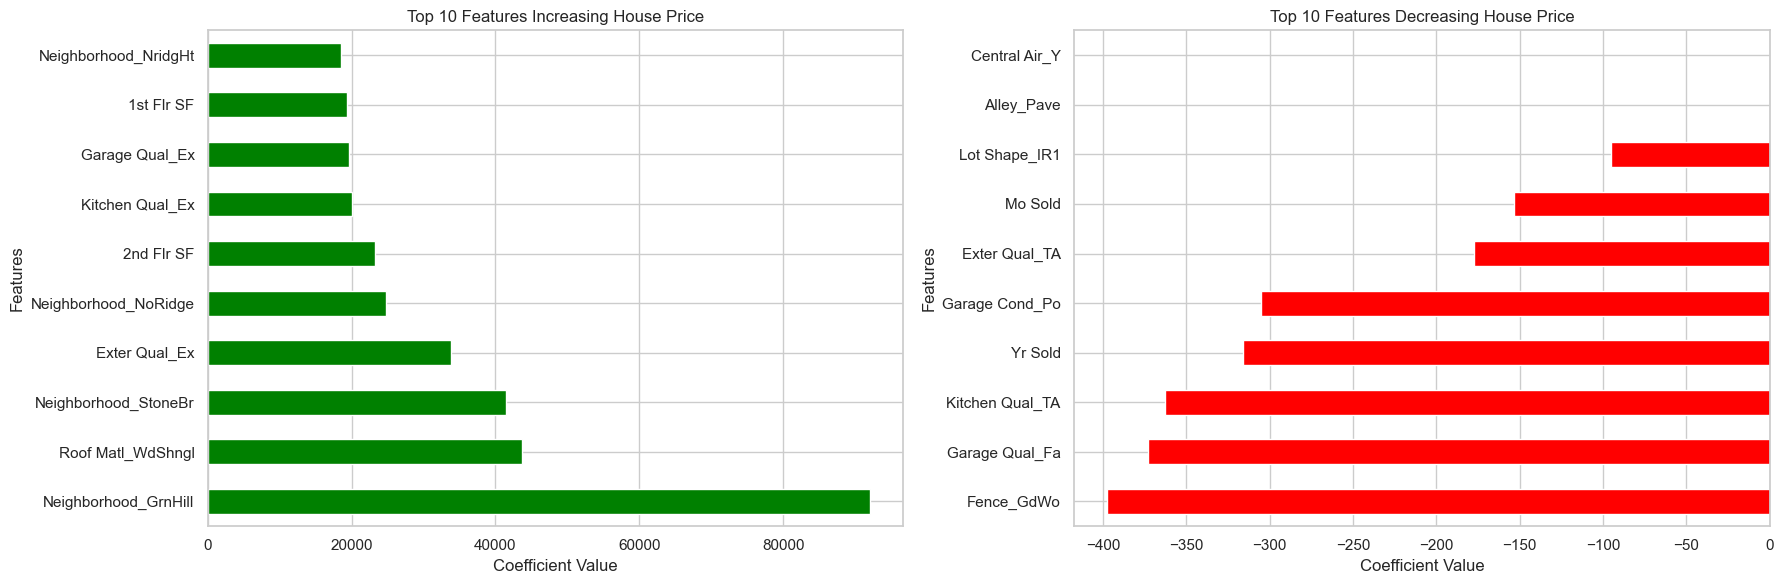

In [ ]:
# Top 10 features increasing price
top_positive_features = sorted_features[sorted_features['Coefficient'] > 0].head(10)

# Top 10 features decreasing price
top_negative_features = sorted_features[sorted_features['Coefficient'] < 0].tail(10)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 positive
top_positive_features['Coefficient'].plot(kind='barh', color='green', ax=ax[0])
ax[0].set_title('Top 10 Features Increasing House Price')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Features')

# Top 10 negative
top_negative_features['Coefficient'].plot(kind='barh', color='red', ax=ax[1])
ax[1].set_title('Top 10 Features Decreasing House Price')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Features')

plt.tight_layout()
plt.show()


This dual bar chart displays the top 10 features that are positively (on the left) and negatively (on the right) influencing house prices according to a Lasso regression model:

The features on the left are associated with an increase in house price. The longer the bar, the stronger the positive impact on the price. For example, the Garage Qual_Ex feature, which likely represents excellent garage quality, shows a substantial positive effect, suggesting that garages of higher quality are valued more in the housing market. Similarly, certain neighborhoods like StoneBr and NridgHt seem to significantly boost property values, reflecting their desirability or affluence.

The features on the right chart with red bars show a negative correlation with house price. The longer the bar, the more significant the negative impact. For instance, houses sold in the CollgCr neighborhood appear to decrease in value, or features such as Yr Sold (the year the house was sold) negatively correlate with price, possibly indicating a year where market conditions were not favorable.

Each bar represents the coefficient value associated with the feature after the Lasso regression has completed. Coefficients in a Lasso model also serve as a form of feature selection since Lasso can reduce the coefficients of less important features to zero

## Retrain with full Dataset

In [ ]:
lasso_best_estimator.fit(X, y)

test_preds = lasso_best_estimator.predict(test)

## Prepare Submission

In [ ]:
test['SalePrice'] = test_preds

test['Unnamed: 0'] = test['Unnamed: 0'].astype(int)

submission = test[['Unnamed: 0', 'SalePrice']].set_index('Unnamed: 0')

submission.head()

,SalePrice
Unnamed: 0,
1124,126513.978114
188,218400.748195
1727,306700.217582
1658,125869.542131
1424,200555.078770


In [ ]:
submission.to_csv('submission.csv')

## Conclusion & Recommendations

The Lasso regression model has showcased commendable predictive capabilities, reflected by a training RMSE of approximately $19,432 and a validation RMSE of about $21,774. Moreover, the model accounts for a significant portion of the variance in the housing prices, as indicated by the R-squared values of 0.941 for the training set and 0.923 for the validation set, signaling a strong model fit. Despite these strengths, there is potential for enhancement, particularly in the area of high-value house price predictions where the model consistently underestimates. Residual analysis further corroborates this tendency, revealing a slight right skewness pointing to the underestimation of some upper-tier homes. Additionally, the feature importance evaluation illuminates the profound positive influence of attributes such as garage quality and favorable neighborhood locations on housing prices, whereas variables like the year of sale demonstrate a negative impact.